In [2]:
pip install seaborn


                                              0.0/294.9 kB ? eta -:--:--
     -                                        10.2/294.9 kB ? eta -:--:--
     ---                                   30.7/294.9 kB 640.0 kB/s eta 0:00:01
     ---                                   30.7/294.9 kB 640.0 kB/s eta 0:00:01
     ---                                   30.7/294.9 kB 640.0 kB/s eta 0:00:01
     ---                                   30.7/294.9 kB 640.0 kB/s eta 0:00:01
     ---                                   30.7/294.9 kB 640.0 kB/s eta 0:00:01
     ---                                   30.7/294.9 kB 640.0 kB/s eta 0:00:01
     ---                                   30.7/294.9 kB 640.0 kB/s eta 0:00:01
     ---                                   30.7/294.9 kB 640.0 kB/s eta 0:00:01
     ---                                   30.7/294.9 kB 640.0 kB/s eta 0:00:01
     ---                                   30.7/294.9 kB 640.0 kB/s eta 0:00:01
     ---                                   30.7/294.9


[notice] A new release of pip is available: 23.1.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


c:\Users\Praveena\myenv\Lib\site-packages\gym\envs\registration.py:498: UserWarning: WARN: Overriding environment D4x4-FrozenLake-v0 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")


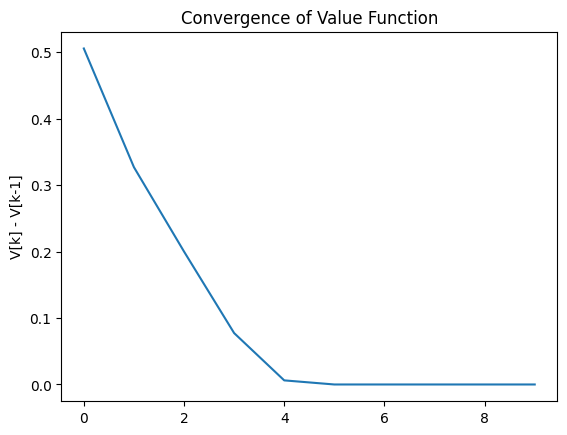

Value Function:
 [0.06888452 0.06140916 0.07440581 0.05580298 0.09184873 0.
 0.11220608 0.         0.14543165 0.24749378 0.29961536 0.
 0.         0.37993361 0.63901895 0.        ]

Policy:
 [0, 3, 0, 3, 0, 0, 0, 0, 3, 1, 0, 0, 0, 2, 1, 0]


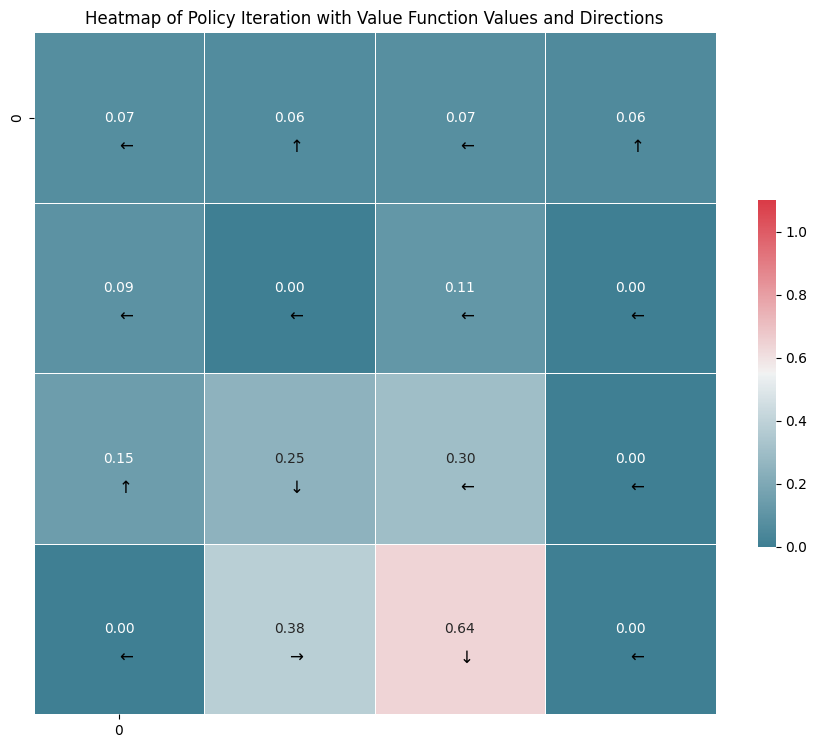

Optimal Q Function:

[[0.06888533 0.06664272 0.06664272 0.05975346]
 [0.0390881  0.0429871  0.04074449 0.06140985]
 [0.07440632 0.06882547 0.07272446 0.05748539]
 [0.03906264 0.03906264 0.03348179 0.05580353]
 [0.09184947 0.07118411 0.06429485 0.04821997]
 [0.         0.         0.         0.        ]
 [0.11220635 0.08988461 0.11220635 0.02232174]
 [0.         0.         0.         0.        ]
 [0.07118411 0.11787763 0.10180275 0.14543225]
 [0.15760958 0.24749419 0.20386469 0.1335141 ]
 [0.29961565 0.26595382 0.22536751 0.10790996]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.18822822 0.30568577 0.3799339  0.26595382]
 [0.39557038 0.6390191  0.61492363 0.53719803]
 [0.         0.         0.         0.        ]]

Episode 1:


TypeError: list indices must be integers or slices, not tuple

In [6]:
import gym
import math
import seaborn
import numpy as np
import matplotlib.pyplot as plt
import time
from gym.envs.registration import register

# Register the FrozenLake environment
register(
    id='D4x4-FrozenLake-v0',
    entry_point='gym.envs.toy_text.frozen_lake:FrozenLakeEnv',
    kwargs={'map_name': '4x4', 'is_slippery': True}
)

# Create the environment with render_mode='human'
env = gym.make('D4x4-FrozenLake-v0', render_mode='human')

def fancy_visual(value_func, policy_int):
    grid = 4
    f, ax = plt.subplots(figsize=(11, 9))



    cmap = seaborn.diverging_palette(220, 10, as_cmap=True)
    reshaped = np.reshape(value_func, (grid, grid))
    seaborn.heatmap(
        reshaped, cmap=cmap, vmax=1.1, square=True,
        xticklabels=grid + 1, yticklabels=grid + 1,
        linewidths=.5, cbar_kws={"shrink": .5}, ax=ax, annot=True, fmt=".2f"
    )

    counter = 0
    for j in range(4):
        for i in range(4):
            if policy_int[counter] == 1:
                plt.text(i + 0.5, j + 0.7, u'↓', fontsize=12)  # Down
            elif policy_int[counter] == 3:
                plt.text(i + 0.5, j + 0.7, u'↑', fontsize=12)  # Up
            elif policy_int[counter] == 0:
                plt.text(i + 0.5, j + 0.7, u'←', fontsize=12)  # Left
            else:
                plt.text(i + 0.5, j + 0.7, u'→', fontsize=12)  # Right
            counter += 1

    plt.title('Heatmap of Policy Iteration with Value Function Values and Directions')
    print('Value Function:\n', value_func)
    print('\nPolicy:\n', policy_int)
    plt.show()

gamma = 0.9

def eval_policy(policy, P, nA, nS, max_iter=10000, epsilon=1e-6):
    V = np.zeros(nS)
    for _ in range(max_iter):
        new_V = np.zeros(nS)
        for s in range(nS):
            for prob, next_s, reward, terminal in P[s][policy[s]]:
                new_V[s] += prob * (reward + gamma * V[next_s])
        if np.max(np.abs(new_V - V)) < epsilon:
            break
        V = new_V
    return new_V

def policy_iter(V, policy, P, nA, nS):
    new_policy = [0] * nS
    for s in range(nS):
        new_v = np.zeros(nA)
        for a in range(nA):
            for prob, next_s, reward, terminal in P[s][a]:
                new_v[a] += prob * (reward + gamma * V[next_s])
        new_policy[s] = np.argmax(new_v)
    return new_policy

def l2(a, b):
    return np.sqrt(np.sum((np.array(a) - np.array(b)) ** 2))

# Initialize policy and value function
policy = [0] * env.observation_space.n
V = eval_policy(policy, env.P, env.action_space.n, env.observation_space.n)

diff = []
n_iter = 10
for _ in range(n_iter):
    policy = policy_iter(V, policy, env.P, env.action_space.n, env.observation_space.n)
    new_V = eval_policy(policy, env.P, env.action_space.n, env.observation_space.n)
    diff.append(l2(V, new_V))
    V = new_V

plt.plot(diff)
plt.ylabel('V[k] - V[k-1]')
plt.title('Convergence of Value Function')
plt.show()

obs = env.reset()
fancy_visual(V, policy)
env.render()

def q_func(V, P, nA, nS):
    q = np.zeros((nS, nA))
    for s in range(nS):
        for a in range(nA):
            for prob, next_s, reward, terminal in P[s][a]:
                q[s][a] += prob * (reward + gamma * V[next_s])
    return q

print('Optimal Q Function:\n')
print(q_func(V, env.P, env.action_space.n, env.observation_space.n))

# Animation of Agent's Movement
def animate_agent(policy, env, episodes=3, delay=0.5):
    for episode in range(episodes):
        obs = env.reset()
        done = False
        print(f"\nEpisode {episode + 1}:")
        time.sleep(1)
        env.render()
        while not done:
            action = policy[obs]
            obs, reward, done, _ = env.step(action)
            time.sleep(delay)
            env.render()
            if done:
                if reward == 1:
                    print("Goal Reached! 🎯")
                else:
                    print("Fell into a hole! 💧")
                break

# Run the animation
animate_agent(policy, env)
